##Markdown
More than one explanatory variable

Parallel slopes regression  
1 categorical and 1 numerical


Simpson's Paradox

More explanatory variables
How linear regression works

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [85]:
fish = pd.read_csv('C:\\Users\\jacooke2\\OneDrive - Wake Tech Community College\\WGU\\D208\\fish.csv')

In [86]:
fish[fish["Species"] == "Perch"].head()


,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [87]:
#ols has response variable on the left and explanatory variable on the right.

#This model gives us the coeffs
mdl_mass_vs_length = ols("Weight ~ Length1", data=fish).fit()
print(mdl_mass_vs_length.params)

Intercept   -462.375079
Length1       32.792164
dtype: float64


In [88]:
#ols on a categorical variable uses + 0 to tell statsmodels not to include an intercept in the model
mdl_mass_vs_species = ols("Weight ~ Species + 0", data=fish).fit()
print(mdl_mass_vs_species.params)

Species[Bream]        617.828571
Species[Parkki]       154.818182
Species[Perch]        382.239286
Species[Pike]         718.705882
Species[Roach]        152.050000
Species[Smelt]         11.178571
Species[Whitefish]    531.000000
dtype: float64


In [89]:
mdl_mass_vs_both = ols("Weight ~ Length1 + Species + 0", data=fish).fit()
print(mdl_mass_vs_both.params)

#1 Slope coefficient
#1 intercept coefficient for each category

Species[Bream]        -668.104379
Species[Parkki]       -639.817999
Species[Perch]        -709.779292
Species[Pike]        -1083.656954
Species[Roach]        -723.959241
Species[Smelt]        -466.484842
Species[Whitefish]    -691.042438
Length1                 42.432029
dtype: float64


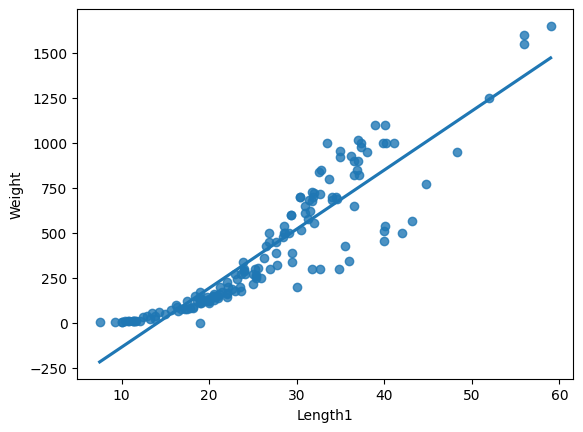

In [90]:
sns.regplot(x="Length1",
            y="Weight",
            data=fish,
            ci=None)
plt.show()

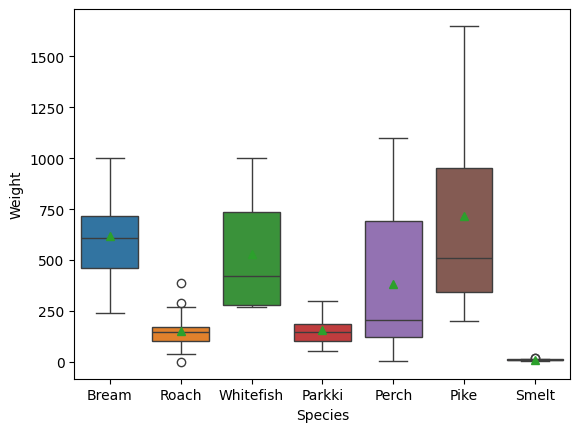

In [91]:
sns.boxplot(x="Species",
            y="Weight",
            data=fish,
            showmeans=True,
            hue="Species")
plt.show()

In [92]:
#Store the params from our model is a panda series called coeffs
coeffs = mdl_mass_vs_both.params
print(type(coeffs))
print(coeffs)

<class 'pandas.core.series.Series'>
Species[Bream]        -668.104379
Species[Parkki]       -639.817999
Species[Perch]        -709.779292
Species[Pike]        -1083.656954
Species[Roach]        -723.959241
Species[Smelt]        -466.484842
Species[Whitefish]    -691.042438
Length1                 42.432029
dtype: float64


In [93]:
ic_bream, ic_parkki, ic_perch, ic_pike, ic_roach, ic_smelt, ic_whitefish, sl = coeffs
print(ic_bream)

-668.1043789376902


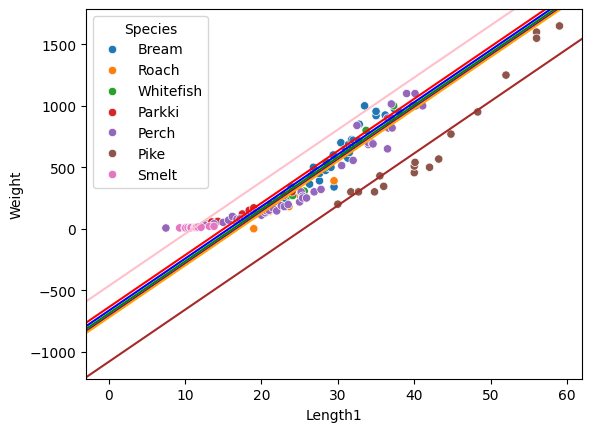

In [94]:
sns.scatterplot(x="Length1",
                y="Weight",
                hue="Species",
                data=fish)

plt.axline(xy1=(0, ic_bream), slope=sl, color="blue")
plt.axline(xy1=(0, ic_parkki), slope=sl, color="red")
plt.axline(xy1=(0, ic_perch), slope=sl, color="purple")
plt.axline(xy1=(0, ic_pike), slope=sl, color="brown")
plt.axline(xy1=(0, ic_roach), slope=sl, color="orange")
plt.axline(xy1=(0, ic_smelt), slope=sl, color="pink")
plt.axline(xy1=(0, ic_whitefish), slope=sl, color="green")

plt.show()

## The Prediction Workflow

In [95]:
# Creating our exploratory explanatory variables.
# 1. Create a pandas DataFrame with one column "length"
# 2. Use NumPy (np) to create a range of values, 5 - 60, counting by 5
expl_data_length = pd.DataFrame({"Length1": np.arange(5, 61, 5)})
print(expl_data_length)

    Length1
0         5
1        10
2        15
3        20
4        25
5        30
6        35
7        40
8        45
9        50
10       55
11       60


In [96]:
#Using the product function from itertools, produce the cartesian combination of each species with each length
# Then, put the combinations into a new dataframe


from itertools import product
species = fish["Species"].unique()
length = np.arange(5, 61, 5)
p = product(species, length)

expl_data_both = pd.DataFrame(p, columns=["Species", "Length1"])
print(expl_data_both)

   Species  Length1
0    Bream        5
1    Bream       10
2    Bream       15
3    Bream       20
4    Bream       25
..     ...      ...
79   Smelt       40
80   Smelt       45
81   Smelt       50
82   Smelt       55
83   Smelt       60

[84 rows x 2 columns]


In [97]:
mdl_mass_vs_both = ols("Weight ~ Length1 + Species + 0", data=fish).fit()
prediction_data_both = expl_data_both.assign(Weight = mdl_mass_vs_both.predict(expl_data_both))

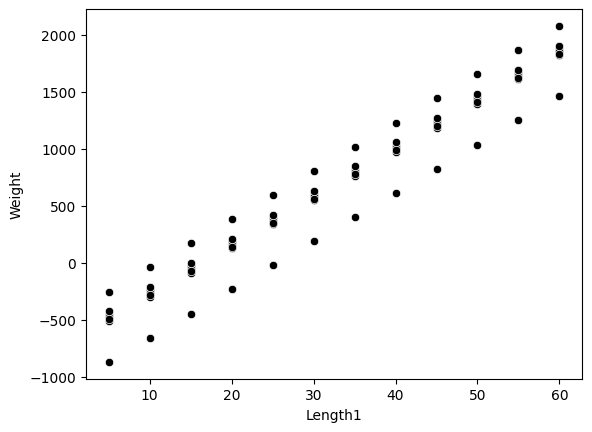

In [99]:
# sns.scatterplot(x="Length1",
#                 y="Weight",
#                 hue="Species",
#                 data=fish)

# plt.axline(xy1=(0, ic_bream), slope=sl, color="blue")
# plt.axline(xy1=(0, ic_parkki), slope=sl, color="red")
# plt.axline(xy1=(0, ic_perch), slope=sl, color="purple")
# plt.axline(xy1=(0, ic_pike), slope=sl, color="brown")
# plt.axline(xy1=(0, ic_roach), slope=sl, color="orange")
# plt.axline(xy1=(0, ic_smelt), slope=sl, color="pink")
# plt.axline(xy1=(0, ic_whitefish), slope=sl, color="green")

sns.scatterplot(x="Length1",
                y="Weight",
                color="black",
                data=prediction_data_both)

plt.show()